# MNIST for Classification

## Imports

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Fetching The Dataset

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Preprocessing

In [19]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [20]:
print(mnist['details'])

{'id': '554', 'name': 'mnist_784', 'version': '1', 'description_version': '2', 'format': 'ARFF', 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 'upload_date': '2014-09-29T03:28:38', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff', 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['Artificial Intelligence', 'AzurePilot', 'Computer Vision', 'Data Sets', 'Kaggle', 'Machine Learning', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'minio_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq', 'status': 'active', 'processing_date': '2020-11-20 20:12:09', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [21]:
X, y = mnist['data'], mnist['target']

In [22]:
X.shape

(70000, 784)

In [23]:
y.shape

(70000,)

In [24]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

5


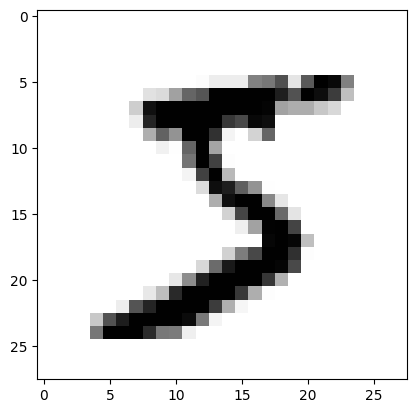

In [25]:
# displaying some of the data
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')

print(y[0])

In [26]:
type(y[0])

str

In [27]:
y = y.astype(np.uint8)

In [28]:
type(y[0])

numpy.uint8

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a "5-detector"
This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [30]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [32]:
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

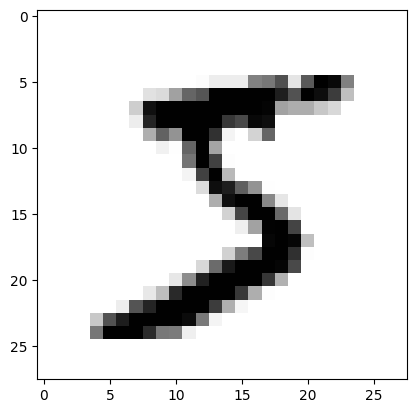

In [33]:
plt.imshow(some_digit_image, cmap='binary')

## Measuring Accuracy Using Cross-Validation

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [35]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the tim

## Confusion Matrix

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [39]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_true=y_train_5, y_pred=y_train_pred))
print('\n')
print(recall_score(y_true=y_train_5, y_pred=y_train_pred))

0.8370879772350012


0.6511713705958311


In [40]:
from sklearn.metrics import f1_score
f1_score(y_true=y_train_5, y_pred=y_train_pred)

0.7325171197343847

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

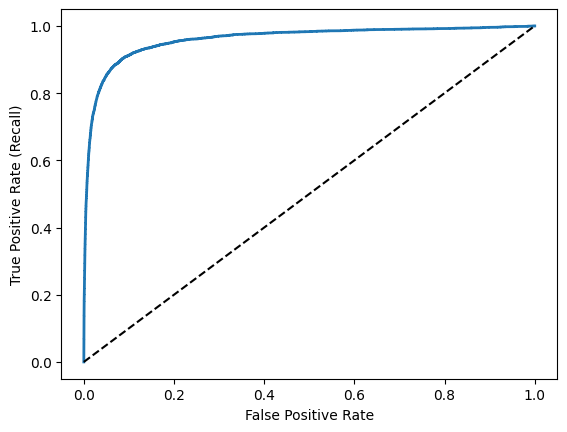

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

plot_roc_curve(fpr, tpr)

## Multiclass Classification

In [44]:
# OVO vs OVR
# importing support vector machine classifier
from sklearn.svm import SVC 

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

under the hood scikit-learn used OVO strategy: it trained 45 binary classifiers.
(0 to 9 in two by two classes : 10 * (10-1) / 2 = 45)

it chooses the OVO strategy automatically.

In [46]:
svm_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [48]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

as expected the highest score is related to the "5" class because the [some_digit] is 5.

In [49]:
np.argmax(some_digit_scores)

5

In [51]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# choosing OVR manually

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

In [ ]:
ovr_clf.predict([some_digit])

In [55]:
# training two models on the whole dataset for the multiclass classification

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
sgd_clf = SGDClassifier()
rf_clf = RandomForestClassifier()
sgd_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [57]:
print(sgd_clf.predict([some_digit]))
print('\n')
print(sgd_clf.decision_function([some_digit]))
print('\n')
print(rf_clf.predict([some_digit]))

[5]


[[-28750.75540158 -29256.20422201 -11087.19280582  -3453.83243794
  -27022.88601012   2678.9560048  -20453.17304727 -20563.43138364
  -10135.66038202  -6454.64936337]]


[5]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Error Analysis